# Working with Raster Data

<br>

In this tutorial you will learn raster-specific pre-processing and analysis steps such as resampling  and reclassification. You will learn how to execute local operations of map algebra in raster calculator and how to summarise raster data using zonal statistics. You will also learn how to create distance, slope and aspect rasters.

We will keep working on siting a solar power station in Zambia, this time using raster data – including the solar power potential.

We will use land cover, and elevation to further optimise the location of the facility: we’d like to avoid cutting trees or building in a swamp. We’d also like to avoid the steepest slopes.

Finally, using solar potential raster (Global Horizontal Irradiance in kWh/m2/year) we will be able to estimate the power which may be available in our selected zones.


<br>

## Analysis Preparation

### Imports

All of these libraries should have been previously installed during the environment set-up, if they have not been installed already you can use ```install.packages(c("sf", "ggplot2"))```

In [1]:
library(sf) # for handling spatial features
library(stars) # for converting between raster and vector data
library(dplyr) # used for data manipulation
library(raster) # useful in some spatial operations
library(ggplot2) # for plotting
library(zeallot) # used for unpacking variables

source('../scripts/helpers.R') # helper script, note that '../' is used to change into the directory above the directory this notebook is in

package 'sp' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Ayrto\AppData\Local\Temp\RtmpqICz71\downloaded_packages


Warning message:
"package 'sf' was built under R version 3.6.3"Linking to GEOS 3.8.0, GDAL 3.0.4, PROJ 6.3.1
Warning message:
"package 'stars' was built under R version 3.6.3"Loading required package: abind

Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Loading required package: sp
Warning message:
"package 'sp' was built under R version 3.6.3"
Attaching package: 'raster'

The following object is masked from 'package:dplyr':

    select

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


<br>

### Loading Data

We'll start by again checking to see if we need to download any data

In [2]:
download_data()

<br>

Then by reading in a shapefile for Zambia

In [2]:
df_zambia <- read_sf('../data/zambia/zambia.shp')

df_zambia

ID,CODE,COUNTRY,areaQ,geometry
761,ZAM,Zambia,777795418089,"POLYGON ((716452.6 8516873,..."


<br>

We'll also load land cover, solar radiance, and elevation raster data from .tif files

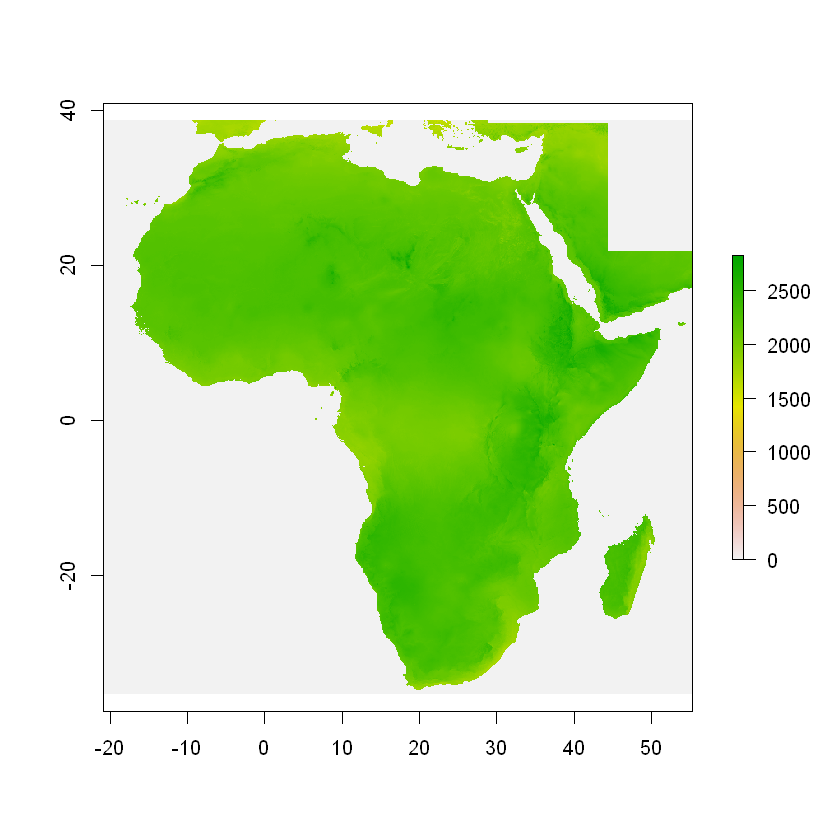

In [3]:
solar <- raster('../data/africa/solar.tif')
land_cover <- raster('../data/africa/land_cover.tif')
elevation <- raster('../data/africa/elevation.tif')

plot(solar)

<br>

### Raster Pre-Processing

In the same way you can clip vectors with a “cookie cutter” outline you can also clip rasters.


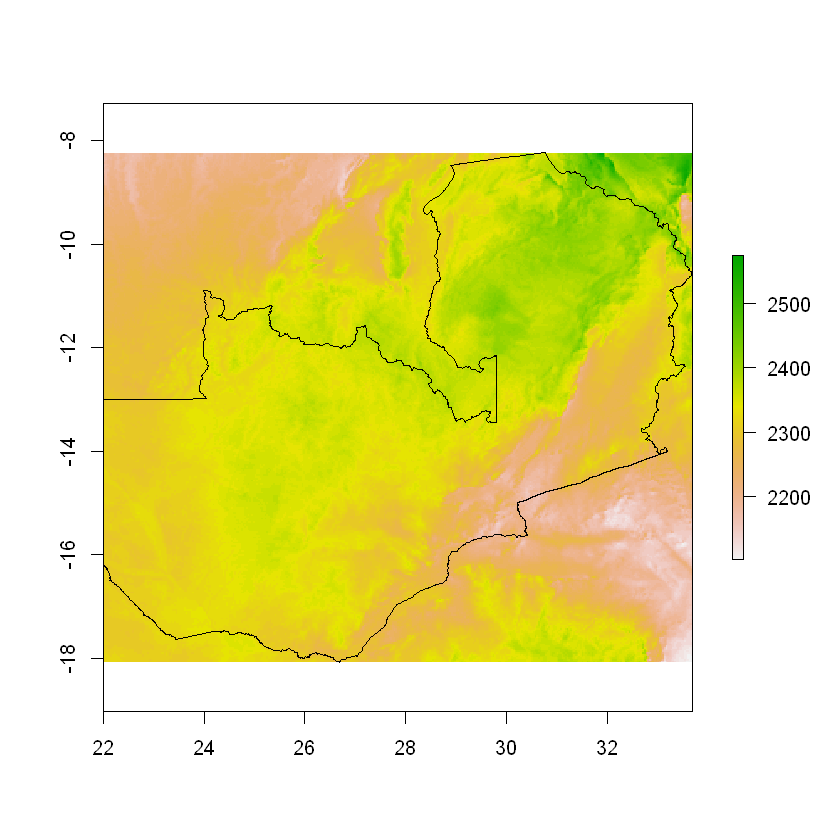

In [101]:
df_zambia_4326 <- st_transform(df_zambia, crs=st_crs(solar))
solar_zambia <- crop(solar, df_zambia_4326)

plot(solar_zambia)
plot(df_zambia_4326['geometry'], add=TRUE)

In [8]:
mask(solar, df_zambia_4326)

ERROR: Error in sp::CRS(SRS_string = from$wkt): no arguments in initialization list


<br>

When we rasterize a Polygon it will try to find an attribute (dataframe column) which can be used to fill in the values of the new raster object, in this case the only numeric column we have relates to the area of a country. 

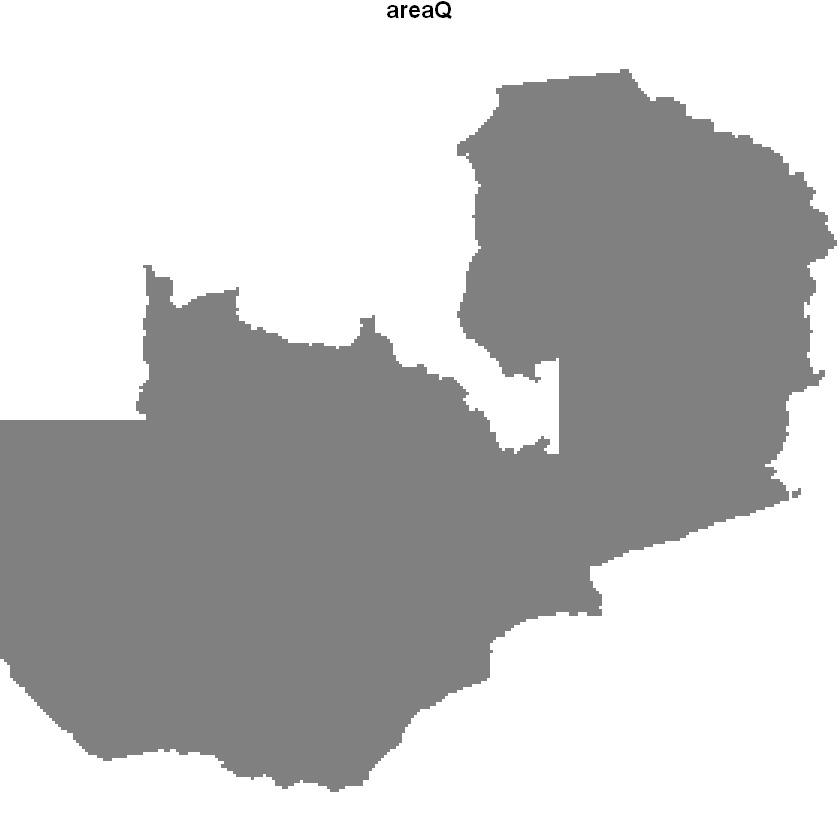

In [71]:
rstr_zambia_4326 <- st_rasterize(df_zambia_4326)

plot(rstr_zambia_4326)